# Zadaća 3
##### Rok za predaju: 17. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Luka Strapač


In [60]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Zadatak 1 (10):
Učitajte podatke iz prošle zadaće (*X\_a i y\_a te X\_b i y\_b*) te nove
podatke *X\_c i y\_c*.
Postavite *SVM* modele koje ćete učiti na učitanim podacima.
Koristite ugrađene klase iz modula *sklearn.svm*. Pratite sljedeće
upute:

1.  Primijenite model SVC s linearnom jezgrenom funkcijom na učitane
    podatke

2.  Ispišite koeficijente $\theta_0$ i $\theta$.

3.  Ispišite potporne vektore.

4.  Izračunajte širinu dobivene margine.

5.  Grafički prikažite podatke, dobivenu hiperravninu koja razdvaja
    podatke i potporne vektore.

6.  Usporedite rezultate iz prošle zadaće s ovom. Odgovorite - u kakvom
    su odnosu dobivene vrijednosti margina u prošloj zadaći i ovoj?

( Učinite to za podatke X\_a, podatke X\_b i X\_c. )

Odaberite jedan od dva skupa podataka (X\_a ili podatke X\_b). Što će se
dogoditi ako iz njega maknete određeni dio podataka? Koristeći
*numpy.random.choice* (ili bilo koju drugu metodu), nasumično odaberite
1000 podataka te na njima ponovite gornji postupak. Usporedite rezultate
s gore dobivenim (parametre, margine, potporne vektore). Što možete
zaključiti o ulozi potpornih vektora?

- Implementirajte funkciju hinge(x, y) koja računa broj krivo određenih
predikcija modela za skup podataka $x$. 
- Testirajte funkciju na vlastitom primjeru (od npr. $4-5$ podataka). 
- Sada proučite ugrađenu hinge\_loss
funkciju
[[Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)]
te ju pokrenite na primjeru kojeg ste odabrali, rezultati vam se moraju
poklapati. 
- Također, pokrenite vašu funkciju na nekom od SVC modela koje
ste implementirali prethodno u zadatku i ispišite dobiveni rezultat.

theta_a0: -1.006493535586035 , theta_a: [-0.50341657  0.50338949]
potporni vektori a: [[ 6.41636799  6.42930926]
 [19.29938341 19.31301455]
 [ 5.00644063  8.99314232]
 [ 5.72973428  9.71630369]
 [13.43259782 17.41947595]
 [12.65785892 16.64416419]]
gama_a: 1.4046533986224539


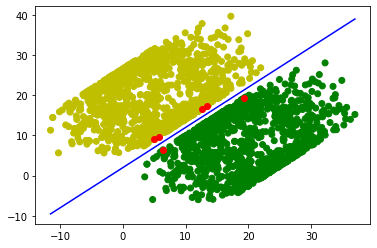

theta_b0: -0.4036828161804967 , theta_b: [-0.16160019  0.1615812 ]
potporni vektori b: [[13.07287283  9.3862776 ]
 [ 7.66758227  3.97609536]
 [15.76276173 12.07636037]
 [ 7.55536057 16.24252895]
 [11.41787863 20.10450994]]
gama_b: 4.375912645121257


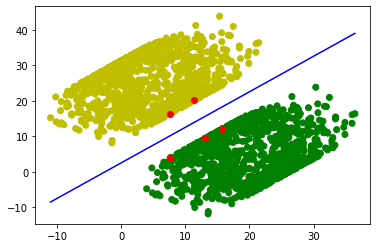

theta_c0: -0.21172008313327714 , theta_c: [-0.28496183  0.32870287]
potporni vektori c: [[ 3.11384486  1.18855273]
 [ 3.10088663  0.45410078]
 [ 6.94217467  3.72313211]
 [ 3.56904562  0.69524978]
 [ 7.63503956  4.28197211]
 [ 1.40702286  7.7114211 ]
 [ 1.98775873  7.52002018]
 [ 0.36031614  7.19260243]
 [ 9.26326061 11.18855273]
 [ 7.80731493 10.45410078]
 [ 2.78282209  5.58306498]
 [ 4.87258042  7.27146905]
 [ 2.35800137  5.73196542]
 [ 4.3700238   6.70151827]
 [ 0.01581934 -2.2885789 ]
 [-0.94771838 -2.47997982]
 [ 0.02488871 -2.80739757]]
gama_c: 2.2987058850853916


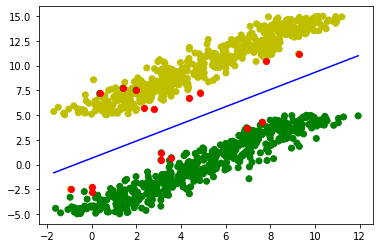

theta_rand0: -0.4085216987757554 , theta_rand: [-0.16139358  0.16176224]
potporni vektori rand: [[14.0538764  10.36656573]
 [14.92586515 11.2378339 ]
 [18.30195192 14.60344187]
 [13.07287283  9.3862776 ]
 [ 7.55536057 16.24252895]]
gama_rand: 4.376256220939762


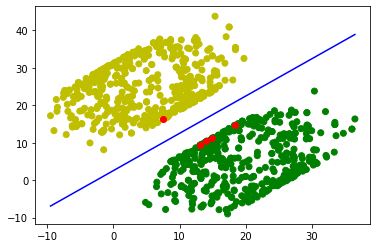

In [3]:
# Vaš kod

def sve(X, y, label):
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    theta = np.concatenate((clf.intercept_, np.array(clf.coef_[0])))
    print('theta_' + label + '0:', theta[0], ', theta_' + label + ':', theta[1:])
    print('potporni vektori ' + label + ':', clf.support_vectors_)
    gama = 1/np.linalg.norm(theta[1:])
    print('gama_' + label + ':', gama)
    
    colors = [('y' if v == 1 else 'g') for v in y]
    
    xrange = np.array([np.min(X[:,0]), np.max(X[:,0])])
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.plot(xrange, -(xrange*theta[1] + theta[0])/theta[2], c='b')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r')
    plt.show()

# Podaci X_a, y_a
data_path = ''

X2 = pd.read_csv(data_path+'X_a.csv').to_numpy()
y2 = pd.read_csv(data_path+'y_a.csv').to_numpy().reshape(-1,)

sve(X2, y2, 'a')

# Podaci X_b, y_b
data_path = ''

X2_b = pd.read_csv(data_path+'X_b.csv').to_numpy()
y2_b = pd.read_csv(data_path+'y_b.csv').to_numpy().reshape(-1,)

sve(X2_b, y2_b, 'b')

# Podaci X_c, y_c
data_path = ''

X2_c = pd.read_csv(data_path+'X_c.csv').to_numpy()
y2_c = pd.read_csv(data_path+'y_c.csv').to_numpy().reshape(-1,)

sve(X2_c, y2_c, 'c')

# 6. U odnosu na prošlu zadaću, širine margine u ovoj su višestruko veće, što je i cilj SVM-a

random_sample = np.random.choice(np.arange(0,X2_b.shape[0]), 1000)
X_rand = X2_b[random_sample]
y_rand = y2_b[random_sample]

sve(X_rand, y_rand, 'rand')

# Parametri i margina ostaju gotovo isti, a potporni vektori se mijenjaju i u vrijednosti i po broju vektora, 
# ali udaljenost tih vektora od pravca je vrlo slična.

# Potporni vektori odredjuju sirinu geometrijske margine.

In [10]:
def hinge(y, y_pred):
    suma=0
    for i in range(len(y)):
        suma = suma + np.max([0.0, 1 - y_pred[i]*y[i]*y_pred[i]])
    
    return suma
    
# Test
y = np.array([-1,-1,1,1])
y_pred = np.array([-2.8, -1.5, 1.5, 1.7])
labels = np.array([0, 1, 2, 3])

print(hinge(y, y_pred))

print(hinge_loss(y, y_pred, labels=labels))
# ... 

12.09
0.0


---
## Zadatak 2 (5)

Učitajte podatke *X\_d, y\_d*. Koristeći ugrađeni model SMV-a
klasificirajte učitane podatke. Ispišite dobivene koeficijente i
izračunajte širinu dobivene margine.\
Grafički prikažite podatke i dobivenu hiperravninu. Među podacima možete
uočiti stršeće vrijednosti, kako one utječu na SVM?

theta_d0: 0.9543262974641871 , theta_d: [-0.2459079   0.05197027]
potporni vektori d: [[11.54148642 17.        ]
 [ 5.99671674 -9.2362004 ]
 [ 0.03260193  1.04548524]]
gama_d: 3.9786802512978436


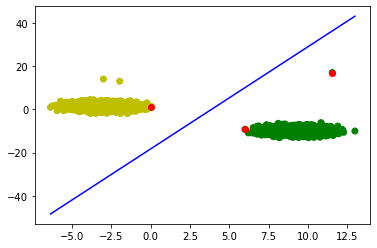

In [36]:
# Vaš kod

# Podaci X_d, y_d
data_path = ''

X_d = pd.read_csv(data_path+'X_d.csv').to_numpy()
y_d = pd.read_csv(data_path+'y_d.csv').to_numpy().reshape(-1,)
clf = SVC(kernel='linear')
clf.fit(X_d, y_d)
theta = np.concatenate((clf.intercept_, np.array(clf.coef_[0])))
print('theta_' + 'd' + '0:', theta[0], ', theta_' + 'd' + ':', theta[1:])
print('potporni vektori ' + 'd' + ':', clf.support_vectors_)
gama = 1/np.linalg.norm(theta[1:])
print('gama_' + 'd' + ':', gama)
colors = [('y' if v == 1 else 'g') for v in y_d]

xrange = np.array([np.min(X_d[:,0]), np.max(X_d[:,0])])
plt.scatter(X_d[:, 0], X_d[:, 1], c=colors)
plt.plot(xrange, -(xrange*theta[1] + theta[0])/theta[2], c='b')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r')
plt.show()

---
## Zadatak 3 (10):
Učitajte podatke *X\_e, y\_e*. 
- Podijelite skup primjera na skup za učenje i skup za testiranje u omjeru 80%:20%. 
- Trenirajte SVM model na podacima za učenje, zatim ispišite dobivene koeficijente i izračunajte širinu dobivene margine.
- Ispitajte točnost modela na skupu za testiranje koristeći prethodno implementiranu hinge funkciju. Postupak ponovite više puta (npr. 10) te uprosječite rezultate.
- Kao i u prethodnim zadacima grafički prikažite podatke i dobivenu hiperravninu. 
- Možete primijetiti kako ovi podaci nisu linearno separabilni, kako to utječe na SVM?

Koeficijenti:  [-1.67374315 -1.97822137]
Širina dobivene margine:  0.38590840570469864
Točnost modela:  212.0


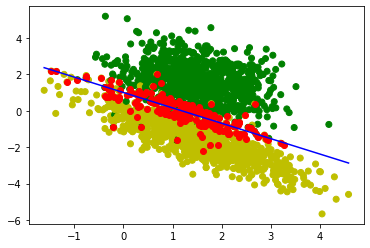

In [69]:
# Vaš kod
data_path = ''
X_e = pd.read_csv(data_path+'X_e.csv').to_numpy()
y_e = pd.read_csv(data_path+'y_e.csv').to_numpy().reshape(-1,)

X_train, X_test, y_train, y_test = train_test_split(X_e, y_e, train_size = 0.8, test_size=0.2)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
thetatrain = np.concatenate((clf.intercept_, np.array(clf.coef_[0])))

gamatrain = 1/np.linalg.norm(thetatrain[1:])
print("Koeficijenti: ",clf.coef_[0])
print("Širina dobivene margine: ",gamatrain)

suma = 0
for i in range(10):
    suma = suma + hinge(y_test, y_pred)

suma = suma/10
print("Točnost modela: ",suma)

colors = [('y' if v == 1 else 'g') for v in y_e]  
xrange = np.array([np.min(X_e[:,0]), np.max(X_e[:,0])])
plt.scatter(X_e[:, 0], X_e[:, 1], c=colors)
plt.plot(xrange, -(xrange*thetatrain[1] + thetatrain[0])/thetatrain[2], c='b')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r')
plt.show()

#Kako ovi podaci nisu linearno separabilni, dogodilo se da neki primjeri nisu dobro klasificirani, no većina ih je ipak dobro klasificirana.
#Također, potpornih vektora je puno više nego u situaciji kada su podaci lin. sep.


---
## Zadatak 4 (5):
Neka je zadana funkcija $g(z) = \frac{1}{1+e^{-z}}$. Pokažite kako je
$1-g(z) = g(-z)$.

Odgovor:

$g(z) = \frac{1}{1+e^{-z}}$

$1 - g(z) = 1 - \frac{1}{1+e^{-z}} = \frac{1+e^{-z}}{1+e^{-z}} - \frac{1}{1+e^{-z}} = \frac{e^{-z}}{1+e^{-z}} = \frac{\frac{1}{e^z}}{1+e^{-z}} = \frac{1}{e^z+1} = \frac{1}{1+e^{-(-z)}} = g(-z)$




---
## Zadatak 5 (10):
Izračunajte gradijent *maximum likelihood* kriterijske funkcije koju ste
vidjeli na predavanju.

Odgovor: 

$J(\theta) = \sum\limits_{i=1}^{m}log(1+e^{-y^{(i)}\theta^{T}x^{(i)}}), \quad \theta = [\theta_0 \cdots \theta_n], \quad x^{(i)} = [1 \; x_1^{(i)} \cdots x_n^{(i)}]\\
\frac{\partial J}{\partial \theta_j} = \frac{\partial}{\partial \theta_j}\sum\limits_{i=1}^{m}log(1+e^{-y^{(i)}\theta^{T}x^{(i)}}) = \sum\limits_{i=1}^{m}\frac{\partial}{\partial \theta_j}log(1+e^{-y^{(i)}\theta^{T}x^{(i)}})\\
= \sum\limits_{i=1}^{m}\frac{\partial}{\partial \theta_j}ln(1+e^{-y^{(i)}(\theta_0+\theta_1x_1^{(i)}+\cdots + \theta_jx_j^{(i)} + \theta_nx_n^{(i)})}) = \sum\limits_{i=1}^{m}-\frac{e^{-y^{(i)}\theta^{T}x^{(i)}}}{1+e^{-y^{(i)}\theta^{T}x^{(i)}}}y^{(i)}x_j^{(i)}\\
=\sum\limits_{i=1}^{m}-\frac{1}{1+e^{y^{(i)}\theta^{T}x^{(i)}}}y^{(i)}x_j^{(i)} = \sum\limits_{i=1}^{m}y^{(i)}x_j^{(i)}(g(y^{(i)}\theta^Tx^{(i)})-1), \quad j = 0,\cdots, n
\\
\nabla J = [\alpha_j], \alpha_j = \sum\limits_{i=1}^{m}y^{(i)}x_j^{(i)}(g(y^{(i)}\theta^Tx^{(i)})-1), \quad j = 0,\cdots, n$


---
## Zadatak 6 (10+10):

Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m\times (k-1)}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k-1$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela. Jedan od takvh modela je logistička regresija. <br>
Logistička regresija kao model funkciju koristi $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$, gdje su $\theta$ parametri koje model uči. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m [-y^{(i)}\log{(h_{\theta}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}]$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom. <br>

1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije ($k=2$). Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte implementiranu funkciju na podacima $X_a, y_a$. Odaberite proizvoljno stopu učenja $\alpha$ i broj iteracija. 
3. Isprobajte implementiranu funkciju na podacima $X_c,y_c$ Kako se logistička regresija ponaša prema podacima koji imaju stršeće vrijednosti?
   Hiperparametre $\alpha$ i broj iteracija odredite koristeći metodu *pretraživanja rešetke*. Napravite rešetku koja će biti definirama vrijednostima $\alpha$, npr. između $0.0001, 0.1$ i brojem iteracija između $100,200$. Za svaki par hiperparametara izračunajte točnost modela (accuracy) i odaberite onaj model s najvećom točnošću. 
4. Isprobajte implementiranu funkciju na podacima $X_d,y_d$. Dodatno nacrtajte graf promjene funkcije cilja kroz iteracije. Opišite dobiveni graf. 


Accuracy koristite kao što je navedeno: `https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html`

In [64]:
#  Vaš kod
X_c = pd.read_csv(data_path+'X_c.csv').to_numpy()
y_c = pd.read_csv(data_path+'y_c.csv').to_numpy()
def g(z):
    return 1/(1 + np.exp(-z))

#1.
def gradientMethod(X,Y,alpha, numIter): 
    n = X.shape[1]
    theta =  np.ones((n,1))
    YX = Y*X
    for i in range(numIter):
        gradJ = YX.T.dot(g(YX.dot(theta)) - 1)
        theta = theta - alpha*gradJ
        
    return theta

def pred(theta, X):
    h = g(X.dot(theta))
    return np.array([1 if p>0.5 else -1 for p in h]).T
#2.
print(gradientMethod(X2,np.array(y2[0]),0.1,1000))
3.
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c)

alphas = []
for alpha in np.arange(0.0001,0.1, 0.001):
    alphas.append(alpha)

numIters = []
for numIteration in np.arange(100,200):
    numIters.append(numIteration)

l=[]
br=0

for acc in np.arange(0,100):
    theta = gradientMethod(X_train, y_train, alphas[acc], numIters[acc])    
    y_pred = pred(theta, X_test) 
    br = accuracy_score(y_test, y_pred)
    l.append(br)
    br=0
    y_pred = 0
    theta = 0


spr = l.index(max(l))
print(alphas[spr])
print(numIters[spr])

    

<ipython-input-64-d787142b3ce4>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


[[360.01055239]
 [650.67479707]]
0.0001
100
